In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [2]:
data_i = np.loadtxt('V1999_i_300s_uncal.dat')
data_r = np.loadtxt('V1999_r_300s_uncal.dat')
data_sdss = np.loadtxt('V1999_sdss_mags.txt')

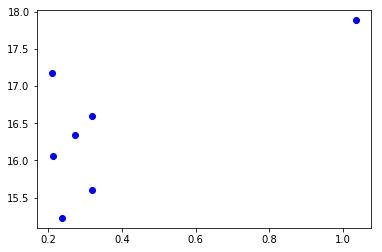

In [3]:
sdss_ref_r = data_sdss[:,4]
sdss_ref_i = data_sdss[:,5]
sdss_ref_ri = sdss_ref_r - sdss_ref_i
plt.plot(sdss_ref_ri,sdss_ref_r,'bo')

In [4]:
mjd_r = data_r[:,0]
dip_r = data_r[:,1]
ref1_r = data_r[:,3]
ref2_r = data_r[:,4]
ref3_r = data_r[:,5]
ref4_r = data_r[:,6]
ref5_r = data_r[:,7]
ref6_r = data_r[:,8]
ref7_r = data_r[:,9]
#careful, V1999 also contains the column for V1959 because they are in the same field

In [5]:
mjd_i = data_i[:,0]
dip_i = data_i[:,1]
ref1_i = data_i[:,3]
ref2_i = data_i[:,4]
ref3_i = data_i[:,5]
ref4_i = data_i[:,6]
ref5_i = data_i[:,7]
ref6_i = data_i[:,8]
ref7_i = data_i[:,9]

In [6]:
ref_r_avg = (ref1_r + ref2_r + ref3_r + ref4_r + ref5_r + ref6_r + ref7_r) / 7.0
ref_i_avg = (ref1_i + ref2_i + ref3_i + ref4_i + ref5_i + ref6_i + ref7_i) / 7.0
dip_r_cor = dip_r - ref_r_avg
dip_i_cor = dip_i - ref_i_avg

In [7]:
ref_i = [ref1_i,ref2_i,ref3_i,ref4_i,ref5_i,ref6_i,ref7_i]
ref_r = [ref1_r,ref2_r,ref3_r,ref4_r,ref5_r,ref6_r,ref7_r]
avg_i = []
std_i = []
avg_r = []
std_r = []
sdss_diff_i = []
sdss_diff_r = []
count = 0
for ref in ref_i:
    ref_cor = ref - ref_i_avg
    sdss_diff = sdss_ref_i[count] - np.average(ref_cor)
    avg_i.append(np.average(ref))
    std_i.append(np.std(ref_cor))
    sdss_diff_i.append(sdss_diff)
    count = count + 1
count = 0
for ref in ref_r:
    ref_cor = ref - ref_r_avg
    sdss_diff = sdss_ref_r[count] - np.average(ref_cor)
    avg_r.append(np.average(ref))
    std_r.append(np.std(ref_cor))
    sdss_diff_r.append(sdss_diff)
    count = count + 1

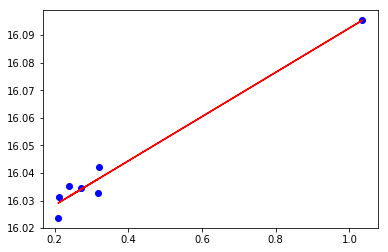

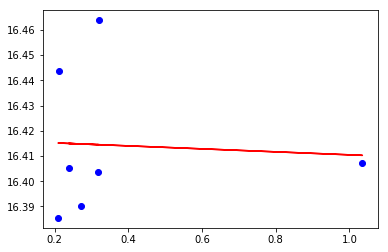

In [8]:
plt.figure(1)
plt.plot(sdss_ref_ri,sdss_diff_i,'bo')
fit_i=np.polyfit(sdss_ref_ri,sdss_diff_i,1)
diff_fit_i = fit_i[1] + fit_i[0]*sdss_ref_ri
plt.plot(sdss_ref_ri,diff_fit_i,'r-')

plt.figure(2)
plt.plot(sdss_ref_ri,sdss_diff_r,'bo')
fit_r=np.polyfit(sdss_ref_ri,sdss_diff_r,1)
diff_fit_r = fit_r[1] + fit_r[0]*sdss_ref_ri
plt.plot(sdss_ref_ri,diff_fit_r,'r-')

[0.7211186440677967, -0.3608474576271186, 1.437915254237288, 1.6216271186440678, 0.504677966101695, -0.06777966101694916, 0.9326610169491526] [0.02996286554520974, 0.017327780927243148, 0.033541210098753965, 0.023881473891788026, 0.031252930940299066, 0.012044772711268475, 0.016053150073149967]


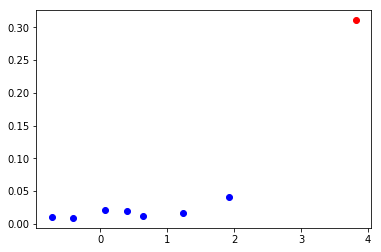

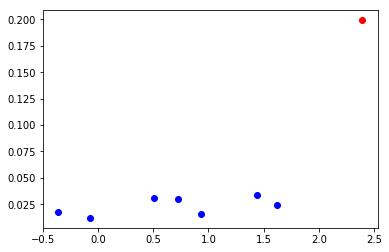

In [9]:
plt.figure(1)
plt.plot(avg_r,std_r,'bo')
plt.plot(np.average(dip_r_cor),np.std(dip_r_cor),'ro')
plt.figure(2)
plt.plot(avg_i,std_i,'bo')
plt.plot(np.average(dip_i_cor),np.std(dip_i_cor),'ro')
print(avg_i,std_i)

In [10]:
cmd_i = []
cmd_r = []
cmd_ri = []
cmd_mjd = []
count_r = 0
for x in mjd_r:
    count_i = 0
    r = dip_r_cor[count_r]
    count_r = count_r + 1
    for y in mjd_i:
        i = dip_i_cor[count_i]
        count_i = count_i + 1
        if (abs(x-y)<0.01):
            cmd_i.append(i)
            cmd_r.append(r)
            cmd_ri.append(r-i)
            cmd_mjd.append((x+y)/2)

In [11]:
cmd_r_cal = cmd_r + fit_r[1] 
cmd_i_cal = cmd_i + fit_i[1]
cmd_ri_cal = cmd_r_cal - cmd_i_cal
cmd_r_cal2 = cmd_r_cal + fit_r[0]*cmd_ri_cal
cmd_i_cal2 = cmd_i_cal + fit_i[0]*cmd_ri_cal
cmd_ri_cal2 = cmd_r_cal2 - cmd_i_cal2
# iterative solution: 
# we know the photometry offset as function of colour, but we don't know the colour yet
# but we know the color term is small. 
# so, calculate colours first without color term in offset, then do the color correction

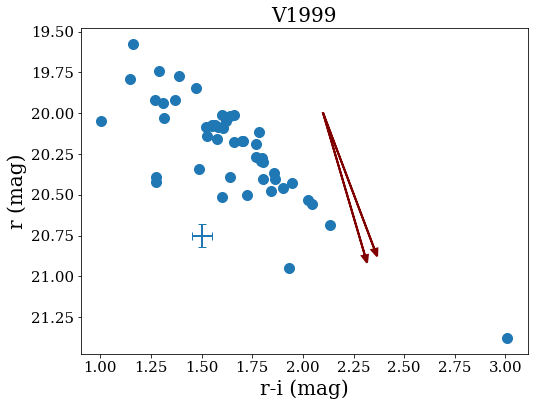

In [14]:
%matplotlib inline
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
fig = plt.figure(figsize=(8, 6))
plt.xlim(np.min(cmd_ri_cal2)-0.1,np.max(cmd_ri_cal2)+0.1)
plt.ylim(np.max(cmd_r_cal2)+0.1,np.min(cmd_r_cal2)-0.1)
plt.xlabel('r-i (mag)',fontsize=20)
plt.ylabel('r (mag)',fontsize=20)
plt.title('V1999',fontsize=20)
#plt.scatter(cmd_ri_cal,cmd_r_cal,s=100)
plt.scatter(cmd_ri_cal2,cmd_r_cal2,s=100)
plt.errorbar(1.5,20.75,0.07,0.05,elinewidth=2,capsize=4)

# wavelength: 7545, 6215
# this is for Av=0.5,  http://www.dougwelch.org/Acurve.html
ext_start_x = 2.1
ext_start_y = 20.0
ext_len_x = (0.8719-0.6655)   # Rv=3.1
ext_len_y = 0.8719 
plt.arrow(ext_start_x,ext_start_y,ext_len_x,ext_len_y,shape='full',lw=2,color='maroon',head_width=0.03)
ext_len_x = (0.8335-0.5801)   # Rv=2.0
ext_len_y = 0.8335 
plt.arrow(ext_start_x,ext_start_y,ext_len_x,ext_len_y,shape='full',lw=2,color='maroon',head_width=0.03)


<Container object of 3 artists>

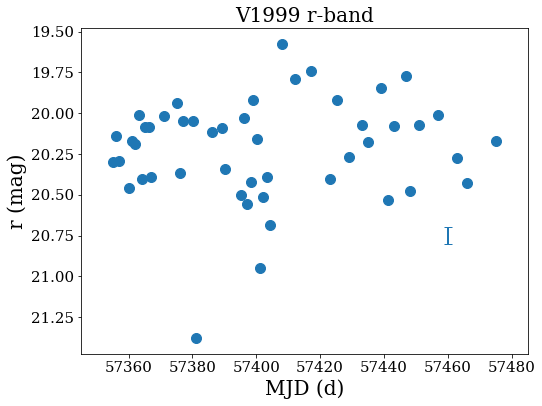

In [15]:
%matplotlib inline
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
fig = plt.figure(figsize=(8, 6))
plt.xlim(np.min(cmd_mjd)-10,np.max(cmd_mjd)+10)
plt.ylim(np.max(cmd_r_cal2)+0.1,np.min(cmd_r_cal2)-0.1)
plt.xlabel('MJD (d)',fontsize=20)
plt.ylabel('r (mag)',fontsize=20)
plt.title('V1999 r-band',fontsize=20)
plt.scatter(cmd_mjd,cmd_r_cal2,s=100)
plt.errorbar(57460,20.75,0.05,elinewidth=2,capsize=4)

<Container object of 3 artists>

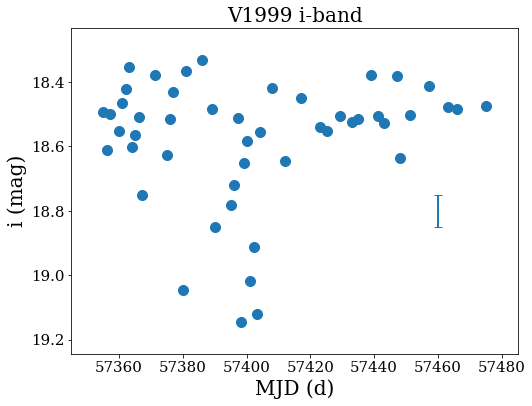

In [16]:
%matplotlib inline
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
fig = plt.figure(figsize=(8, 6))
plt.xlim(np.min(cmd_mjd)-10,np.max(cmd_mjd)+10)
plt.ylim(np.max(cmd_i_cal2)+0.1,np.min(cmd_i_cal2)-0.1)
plt.xlabel('MJD (d)',fontsize=20)
plt.ylabel('i (mag)',fontsize=20)
plt.title('V1999 i-band',fontsize=20)
plt.scatter(cmd_mjd,cmd_i_cal2,s=100)
plt.errorbar(57460,18.8,0.05,elinewidth=2,capsize=4)

In [17]:
print('median r', np.median(cmd_r_cal2))
print('median i', np.median(cmd_i_cal2))
print('sigma r', np.std(cmd_r_cal2))
print('sigma i', np.std(cmd_i_cal2))
print('amplitude r', np.max(cmd_r_cal2) - np.min(cmd_r_cal2))
print('amplitude i', np.max(cmd_i_cal2) - np.min(cmd_i_cal2))
print('no r', len(cmd_r_cal2))
print('no i', len(cmd_i_cal2))

median r 20.171138054668972
median i 18.51426307770831
sigma r 0.31120129657161566
sigma i 0.19468142432900798
amplitude r 1.797743361016515
amplitude i 0.8129657772941599
no r 48
no i 48


In [18]:
sort_lc = np.sort(cmd_r_cal2)
num = len(sort_lc)
med = np.median(sort_lc)
rms = np.std(sort_lc)
num10 = int(num / 10.0)
num90 = int(9.0 * num / 10.0)
sort_lc_10 = sort_lc[0:num10]
sort_lc_90 = sort_lc[num90+1:num]
sort_lc_ext = np.concatenate([sort_lc_10,sort_lc_90])
ext_mean = np.mean(sort_lc_ext)
M = (ext_mean - med)/rms
print('symmetry r', M)

sort_lc = np.sort(cmd_i_cal2)
num = len(sort_lc)
med = np.median(sort_lc)
rms = np.std(sort_lc)
num10 = int(num / 10.0)
num90 = int(9.0 * num / 10.0)
sort_lc_10 = sort_lc[0:num10]
sort_lc_90 = sort_lc[num90+1:num]
sort_lc_ext = np.concatenate([sort_lc_10,sort_lc_90])
ext_mean = np.mean(sort_lc_ext)
M = (ext_mean - med)/rms
print('symmetry i', M)

symmetry r 0.43458844804351643
symmetry i 1.054754556500516
